Data preparation

In [2]:
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
# Plotting the gender distribution
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dataset = pd.read_csv(r"C:\Users\eaditb\Documents\EB_MLOPS_MID_PROJECT_1\artifacts\raw\customers_data.csv")


In [4]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# PreProcessing

In [34]:
# 'TotalCharges' is initially an object type due to some non-numeric values (like ' ').
# Convert 'TotalCharges' to numeric, coercing errors to NaN, then drop rows with NaN.
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')
dataset.dropna(subset=['TotalCharges'], inplace=True)



In [5]:
# Nulls:
dataset['TotalCharges'] = dataset['TotalCharges'].fillna(2279) # 2279 mean value in data
dataset['TotalCharges'] = dataset['TotalCharges'].astype(str)
dataset['TotalCharges'] = dataset['TotalCharges'].str.replace(' ','2279') # remove space string in data
dataset['TotalCharges'] = dataset['TotalCharges'].astype(float)
dataset['PhoneService'].fillna('No')
dataset['tenure'] = dataset['tenure'].fillna(dataset['tenure'].mean())

In [6]:
# Contract is a importnent feature in the model and cant be null, in case of null the model will not predict and need to sand alert.
dataset['Contract'] = dataset['Contract'].dropna()

In [7]:
# Feature handeling:
dataset['PhoneService'] = dataset['PhoneService'].map({'Yes':1,'No':0})

dataset = dataset.join(pd.get_dummies(dataset['Contract']).astype(int))

In [8]:
prdict_columns = ['TotalCharges','Month-to-month','One year','Two year','PhoneService','tenure']

In [9]:
print(dataset.columns)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Month-to-month', 'One year', 'Two year'],
      dtype='object')


# Train

Random Forest Classifier Evaluation:
Accuracy: 0.751596877217885

Confusion Matrix:
 [[873 154]
 [196 186]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83      1027
           1       0.55      0.49      0.52       382

    accuracy                           0.75      1409
   macro avg       0.68      0.67      0.67      1409
weighted avg       0.74      0.75      0.75      1409



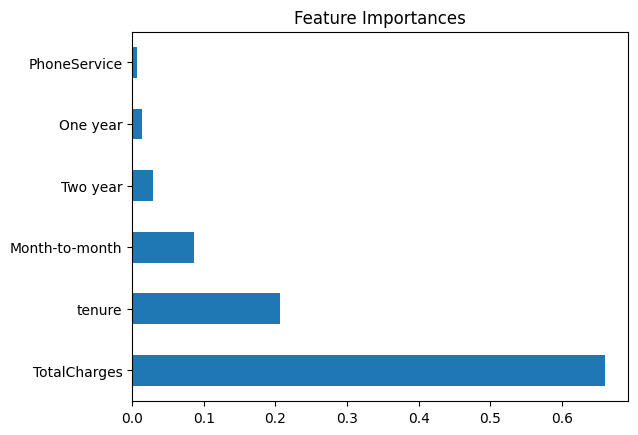

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Prepare the data for training
X = dataset[prdict_columns]
y = dataset['Churn'].map({'Yes': 1, 'No': 0}) # Convert target variable to numerical

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust n_estimators
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance (optional, but good for understanding the model)
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.show()

In [11]:
# Save the trained model using pickle
with open('churn_model.pickle', 'wb') as f:
  pickle.dump(model, f)

print("Model saved as churn_model.pickle")

Model saved as churn_model.pickle


Check load model

In [12]:
with open('churn_model.pickle', 'rb') as f:
    rf_model = pickle.load(f)

In [13]:
rf_model.predict(dataset[prdict_columns])

array([0, 0, 1, ..., 0, 1, 0], shape=(7043,))